In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')

In [2]:
df = pd.read_csv("Pasion et al dataset.csv")
df.sample(10)

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
10077,March AFB,20171126,1500,33.90,-117.26,458,2.017110e+11,11,15,Fall,24.60938,29.11339,8.23192,7,10.0,961.1,722
2173,Grissom,20180724,1100,40.67,-86.15,239,2.018070e+11,7,11,Summer,64.84985,29.10332,2.48882,8,10.0,986.5,26
5926,JDMT,20171204,1500,26.98,-80.11,2,2.017120e+11,12,15,Winter,35.82764,38.71338,17.96034,11,10.0,1019.3,722
18376,Travis,20180902,1100,38.16,-121.56,1,2.018090e+11,9,11,Fall,37.60376,31.63109,11.79780,7,10.0,1006.9,722
12076,MNANG,20180905,1000,44.89,-93.20,246,2.018090e+11,9,10,Fall,79.33350,18.70270,1.75940,16,10.0,991.5,160
6966,Kahului,20180104,1400,20.89,-156.44,2,2.018010e+11,1,14,Winter,53.01514,27.05391,16.92037,20,10.0,1017.5,722
18374,Travis,20180901,1500,38.16,-121.56,1,2.018090e+11,9,15,Fall,30.14526,35.44289,13.71369,16,10.0,1005.9,722
9678,March AFB,20170921,1000,33.90,-117.26,458,2.017090e+11,9,10,Fall,48.96851,24.60922,4.27320,10,10.0,957.2,60
13024,Offutt,20180914,1400,41.13,-95.75,380,2.018090e+11,9,14,Fall,43.62793,38.76122,18.79471,9,10.0,978.4,722
4249,Hill Weber,20180519,1000,41.15,-111.99,1370,2.018050e+11,5,10,Spring,41.55273,23.23456,19.13467,9,10.0,852.5,722


In [3]:
df.columns

Index(['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude',
       'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
       'PolyPwr', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling'],
      dtype='object')

In [4]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


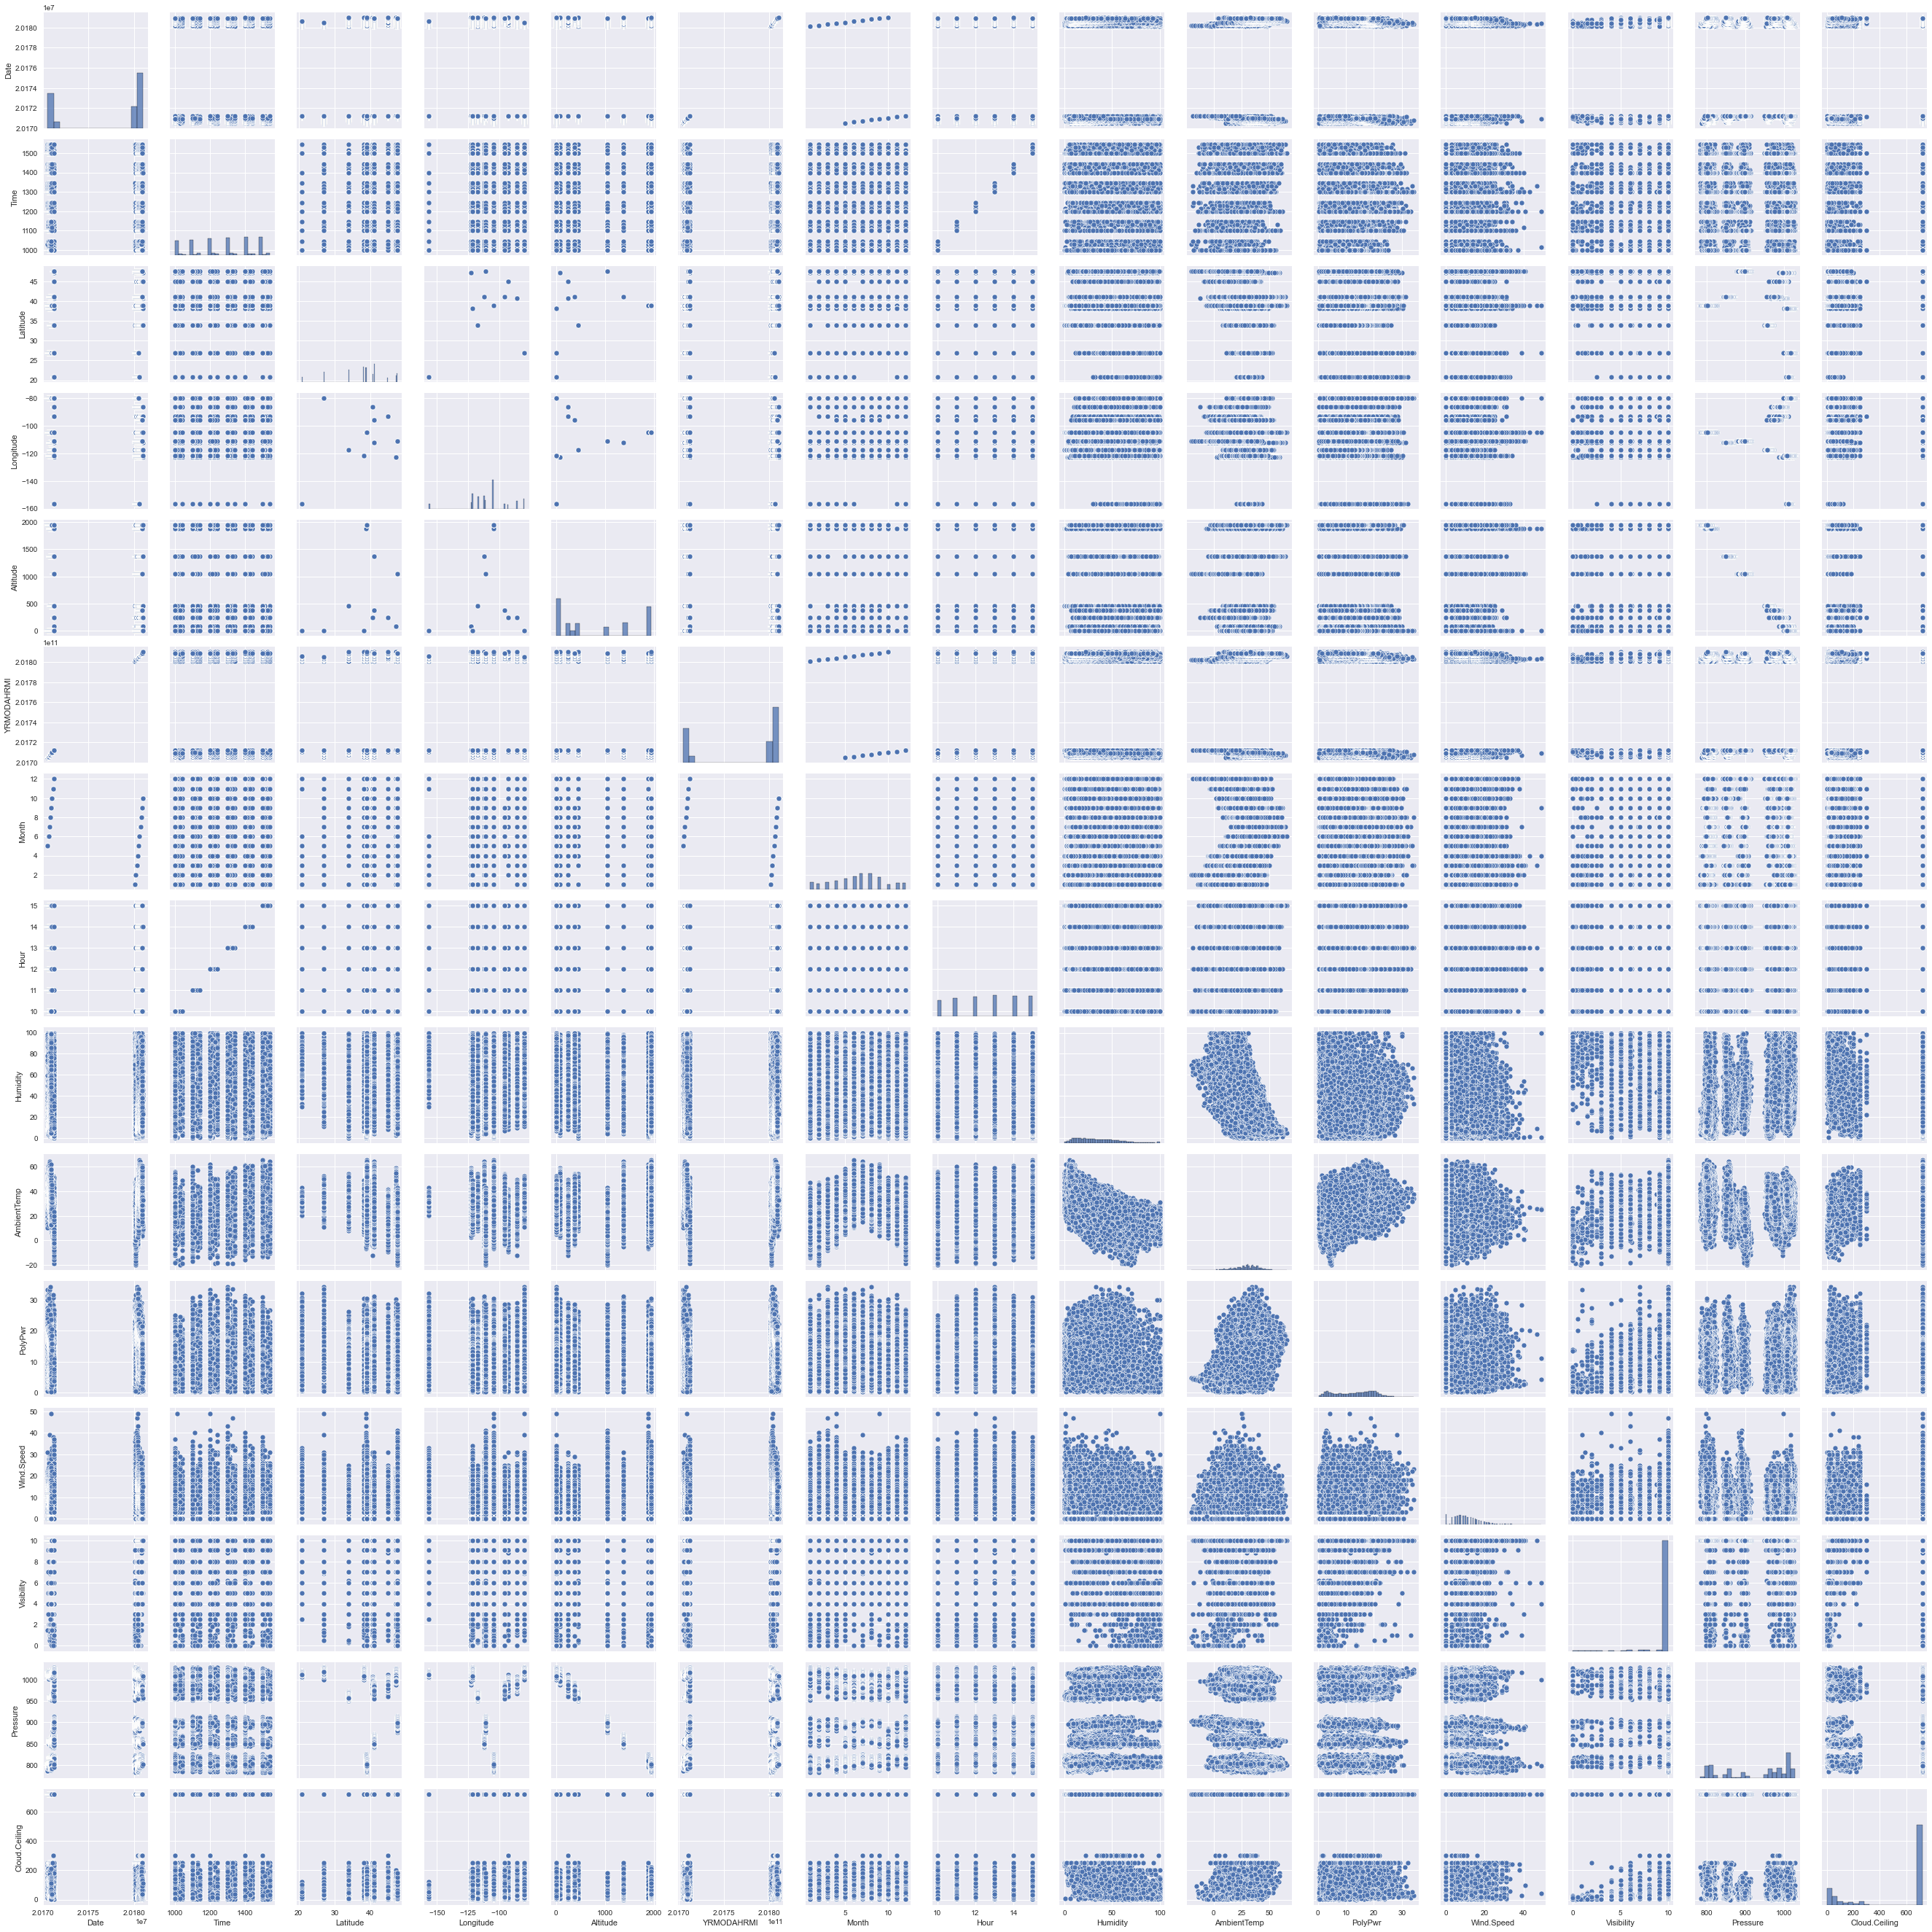

In [6]:
sns.pairplot(df)

In [5]:
df_corr = df[['Location', 'Time', 'Latitude', 'Longitude', 'Altitude',
              'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
              'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr()

In [6]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

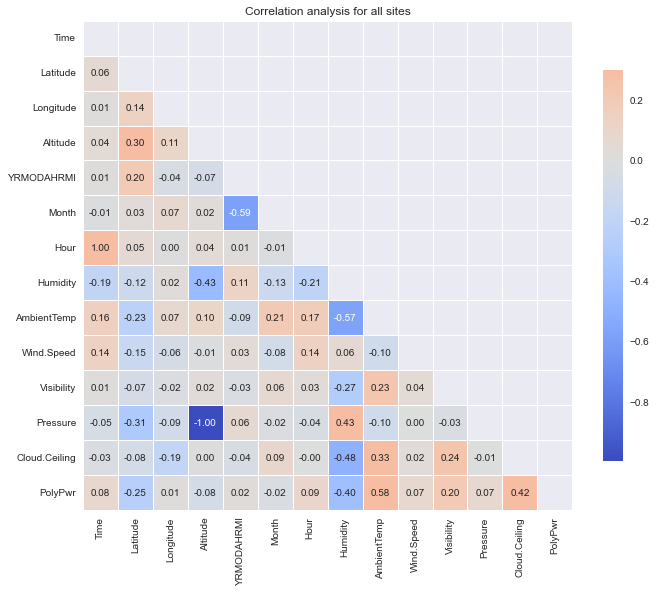

In [7]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation analysis for all sites')
plt.show()


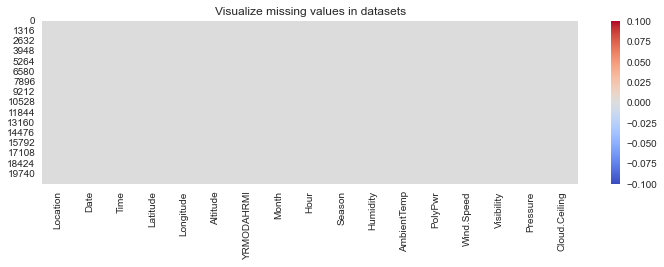

In [8]:
plt.figure(figsize=(12, 3))
sns.heatmap(df.isnull(), cmap='coolwarm');
plt.title('Visualize missing values in datasets');

count    21045.000000
mean        12.627845
std          1.672952
min         10.000000
25%         11.000000
50%         13.000000
75%         14.000000
max         15.000000
Name: Hour, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_1392\2519084757.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Hour)


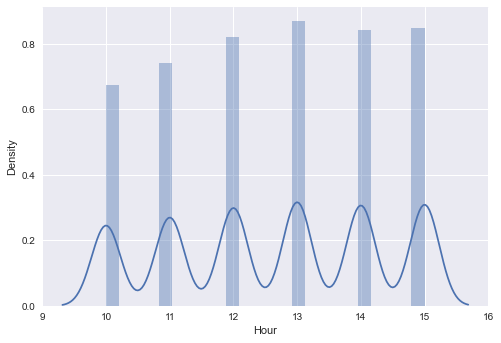

In [9]:
print(df.Hour.describe())
ax = sns.distplot(df.Hour)

count    21045.000000
mean        12.978583
std          7.123255
min          0.257330
25%          6.404570
50%         13.798700
75%         18.863650
max         34.285020
Name: PolyPwr, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_1392\1873856200.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.PolyPwr)


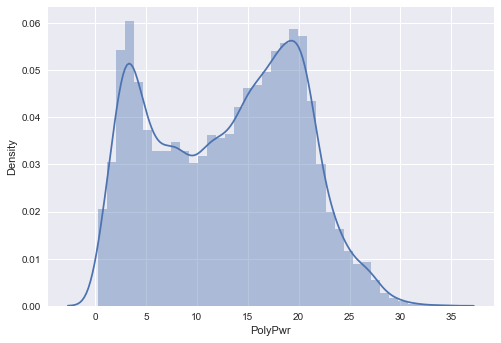

In [12]:
print(df.PolyPwr.describe())
ax = sns.distplot(df.PolyPwr)

In [6]:
df_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)
df_loc_season_en = pd.get_dummies(df_location_en, columns=['Season'], drop_first=True)
df_loc_season_en.sample(10)

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,...,Location_MNANG,Location_Malmstrom,Location_March AFB,Location_Offutt,Location_Peterson,Location_Travis,Location_USAFA,Season_Spring,Season_Summer,Season_Winter
12731,20180709,1400,41.13,-95.75,380,2.018070e+11,7,14,34.17358,40.64697,...,0,0,0,1,0,0,0,0,1,0
1644,20180514,1500,40.67,-86.15,239,2.018050e+11,5,15,37.73193,34.86382,...,0,0,0,0,0,0,0,1,0,0
15723,20180927,1300,38.82,-104.71,1879,2.018090e+11,9,13,2.69165,43.26790,...,0,0,0,0,1,0,0,0,0,0
5337,20170724,1300,26.98,-80.11,2,2.017070e+11,7,13,50.54932,38.73100,...,0,0,0,0,0,0,0,0,1,0
18981,20170730,1000,38.95,-104.83,1947,2.017070e+11,7,10,73.42529,24.54880,...,0,0,0,0,0,0,1,0,1,0
9049,20180809,1400,47.52,-111.18,1043,2.018080e+11,8,14,11.99341,38.13179,...,0,1,0,0,0,0,0,0,1,0
11787,20180713,1500,44.89,-93.20,246,2.018070e+11,7,15,69.75708,27.69592,...,1,0,0,0,0,0,0,0,1,0
18183,20180729,1500,38.16,-121.56,1,2.018070e+11,7,15,30.37109,35.45296,...,0,0,0,0,0,1,0,0,1,0
9502,20170823,1200,33.90,-117.26,458,2.017080e+11,8,12,42.85889,31.57822,...,0,0,1,0,0,0,0,0,1,0
16703,20171123,1200,38.16,-121.56,1,2.017110e+11,11,12,76.12915,19.99680,...,0,0,0,0,0,1,0,0,0,0


In [27]:
df_loc_season_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21045 non-null  int64  
 1   Time                 21045 non-null  int64  
 2   Latitude             21045 non-null  float64
 3   Longitude            21045 non-null  float64
 4   Altitude             21045 non-null  int64  
 5   YRMODAHRMI           21045 non-null  float64
 6   Month                21045 non-null  int64  
 7   Hour                 21045 non-null  int64  
 8   Humidity             21045 non-null  float64
 9   AmbientTemp          21045 non-null  float64
 10  PolyPwr              21045 non-null  float64
 11  Wind.Speed           21045 non-null  int64  
 12  Visibility           21045 non-null  float64
 13  Pressure             21045 non-null  float64
 14  Cloud.Ceiling        21045 non-null  int64  
 15  Location_Grissom     21045 non-null 

In [ ]:
for x in df['Hour']:
    print(x)

In [25]:
df_loc_season_en['delta_hr']= df_loc_season_en.Hour - min(df.Hour)
df_loc_season_en['sine_mon']= np.sin(2*(df_loc_season_en.Month - 1)*np.pi/11)
df_loc_season_en['cos_mon']= np.cos(2*(df_loc_season_en.Month - 1)*np.pi/11)
df_loc_season_en['sine_hr']= np.sin(2*(df_loc_season_en.delta_hr*np.pi/(max(df.Hour) - min(df.Hour))))
df_loc_season_en['cos_hr']= np.cos(2*(df_loc_season_en.delta_hr*np.pi/(max(df.Hour) - min(df.Hour))))

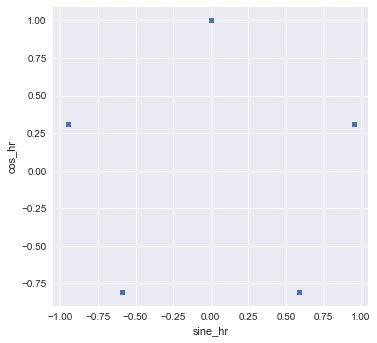

In [26]:
ax = df_loc_season_en.plot.scatter('sine_hr', 'cos_hr').set_aspect('equal')

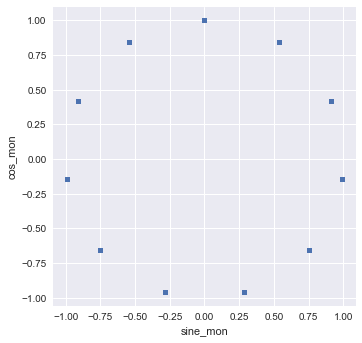

In [10]:
ax = df_loc_season_en.plot.scatter('sine_mon', 'cos_mon').set_aspect('equal')

In [11]:
select= ['Latitude', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
                     'Visibility', 'Pressure', 'Cloud.Ceiling', 
                     'Season_Spring', 'Season_Summer', 'Season_Winter',
                     'sine_mon', 'cos_mon', 'sine_hr', 'cos_hr']

In [12]:
df_select = df_loc_season_en[select].reset_index(drop=True)
df_select

,Latitude,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Season_Spring,Season_Summer,Season_Winter,sine_mon,cos_mon,sine_hr,cos_hr
0,47.11,81.71997,12.86919,2.42769,5,10.0,1010.6,722,0,0,1,-1.133108e-15,1.000000,9.510565e-01,0.309017
1,47.11,96.64917,9.66415,2.46273,0,10.0,1011.3,23,0,0,1,-1.133108e-15,1.000000,-5.877853e-01,-0.809017
2,47.11,93.61572,15.44983,4.46836,5,10.0,1011.6,32,0,0,1,-1.133108e-15,1.000000,-5.877853e-01,-0.809017
3,47.11,77.21558,10.36659,1.65364,5,2.0,1024.4,6,0,0,1,-1.133108e-15,1.000000,5.877853e-01,-0.809017
4,47.11,54.80347,16.85471,6.57939,3,3.0,1023.7,9,0,0,1,-1.133108e-15,1.000000,-9.510565e-01,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,38.95,11.66992,43.22510,9.79611,14,10.0,802.3,722,0,0,0,-9.898214e-01,-0.142315,-2.449294e-16,1.000000
21041,38.95,18.22510,28.98247,10.88992,13,10.0,799.2,722,0,0,0,-9.898214e-01,-0.142315,-5.877853e-01,-0.809017
21042,38.95,15.52124,33.49167,8.24479,10,10.0,798.4,722,0,0,0,-9.898214e-01,-0.142315,-9.510565e-01,0.309017
21043,38.95,6.63452,51.62163,12.47328,10,10.0,797.8,722,0,0,0,-9.898214e-01,-0.142315,-2.449294e-16,1.000000


In [13]:
target_label = 'PolyPwr'
features = list(set(select).difference(set([target_label])))
features

['Wind.Speed',
 'Humidity',
 'Pressure',
 'Season_Winter',
 'Season_Summer',
 'Cloud.Ceiling',
 'cos_mon',
 'sine_hr',
 'AmbientTemp',
 'Latitude',
 'Visibility',
 'sine_mon',
 'cos_hr',
 'Season_Spring']

Split Train and Test Dataset

In [14]:
import optuna
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
X = df_select[features].reset_index(drop=True)
y = df_select[target_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Gradient Boosting (Lightgbm)

In [16]:
n_estimators_list = [int(50*x) for x in range(2, 30)]

learning_rate_list = [round(x/500, 4) for x in range(2, 25)]

max_depth_list = [int(x) for x in range(3, 13)]
max_depth_list.append(-1)

n_leaves_list = [int(50*x) for x in range(2, 30)]

feature_fraction_list = [x/10 for x in range(1, 10)]

objective_list = ['rmse', 'mae', 'mape'] 

In [ ]:
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', n_estimators_list),
        'learning_rate': trial.suggest_categorical('learning_rate', learning_rate_list),
        'max_depth': trial.suggest_categorical('max_depth', max_depth_list),
        'num_leaves': trial.suggest_categorical('num_leaves', n_leaves_list),
        'feature_fraction': trial.suggest_categorical('feature_fraction', feature_fraction_list),
        'objective': trial.suggest_categorical('objective', objective_list),
        'random_state': 42
    }

    # Train the LightGBM model with the hyperparameters
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

In [20]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}
Best value: 4.058548733904064
Best trial:  [FrozenTrial(number=67, state=TrialState.COMPLETE, values=[4.058548733904064], datetime_start=datetime.datetime(2023, 7, 17, 13, 52, 41, 497598), datetime_complete=datetime.datetime(2023, 7, 17, 13, 52, 53, 527894), params={'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450)), 'learning_rate': CategoricalDistribution(choices=(0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042

In [21]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_lgbm.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_lgbm.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'lgbm_model.pkl')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

['lgbm_model.pkl']

RandomForestRegressor

In [42]:
import optuna
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
n_estimators_list = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features_list = ['auto', 'sqrt']

max_depth_list = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth_list.append(None)

min_samples_split_list = [2, 5, 10]

min_samples_leaf_list = [1, 2, 4]

bootstrap_list = [True, False]

In [48]:
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', n_estimators_list),
        'max_features': trial.suggest_categorical('max_features', max_features_list),
        'max_depth': trial.suggest_categorical('max_depth', max_depth_list),
        'min_samples_split': trial.suggest_categorical('min_samples_split', min_samples_split_list),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', min_samples_leaf_list),
        'bootstrap': trial.suggest_categorical('bootstrap', bootstrap_list),
        'random_state': 42
    }

    # Train the Random Forest model with the hyperparameters
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=20)

[I 2023-07-17 11:57:53,347] A new study created in memory with name: no-name-c4bc767b-e5f4-4e86-b0cf-bc78c9e4dce5
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-07-17 11:58:39,495] Trial 0 finished with value: 5.0146062281877235 and parameters: {'n_estimators': 600, 'max_features': 'auto', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: 5.0146062281877235.
[I 2023-07-17 11:58:51,936] Trial 1 finished with value: 4.108989343582259 and parameters: {'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 1 wit

In [18]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}
Best value: 4.058548733904064
Best trial:  [FrozenTrial(number=67, state=TrialState.COMPLETE, values=[4.058548733904064], datetime_start=datetime.datetime(2023, 7, 17, 13, 52, 41, 497598), datetime_complete=datetime.datetime(2023, 7, 17, 13, 52, 53, 527894), params={'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450)), 'learning_rate': CategoricalDistribution(choices=(0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042

In [19]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_rf.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_rf.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'rf_model.pkl')

NameError: name 'RandomForestRegressor' is not defined

ElasticNet : linear regression model

In [32]:
import optuna
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
def objective(trial):
    # Define the hyperparameters to optimize
    alpha = trial.suggest_float('alpha', 0.001, 1.0)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    # Create an instance of ElasticNet with the suggested hyperparameters
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

[I 2023-07-17 11:32:01,438] A new study created in memory with name: no-name-c74a9d5b-af69-40f5-88f7-101c715b200d
[I 2023-07-17 11:32:01,527] Trial 0 finished with value: 25.318634965192032 and parameters: {'alpha': 0.26408069511475435, 'l1_ratio': 0.18821854557465045}. Best is trial 0 with value: 25.318634965192032.
[I 2023-07-17 11:32:01,618] Trial 1 finished with value: 24.865527081538612 and parameters: {'alpha': 0.17612048190701493, 'l1_ratio': 0.004507312428401744}. Best is trial 1 with value: 24.865527081538612.
[I 2023-07-17 11:32:01,659] Trial 2 finished with value: 28.39598093118735 and parameters: {'alpha': 0.9758910101543595, 'l1_ratio': 0.6063892195540483}. Best is trial 1 with value: 24.865527081538612.
[I 2023-07-17 11:32:01,702] Trial 3 finished with value: 28.29150115497137 and parameters: {'alpha': 0.8259098387495983, 'l1_ratio': 0.6824416837062557}. Best is trial 1 with value: 24.865527081538612.
[I 2023-07-17 11:32:01,940] Trial 4 finished with value: 23.97299258231

In [36]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'alpha': 0.017736148587593977, 'l1_ratio': 0.9238976969562384}
Best value: 23.96928224241862
Best trial:  [FrozenTrial(number=94, state=TrialState.COMPLETE, values=[23.96928224241862], datetime_start=datetime.datetime(2023, 7, 17, 11, 32, 17, 500093), datetime_complete=datetime.datetime(2023, 7, 17, 11, 32, 17, 739241), params={'alpha': 0.017736148587593977, 'l1_ratio': 0.9238976969562384}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'alpha': FloatDistribution(high=1.0, log=False, low=0.001, step=None), 'l1_ratio': FloatDistribution(high=1.0, log=False, low=0.0, step=None)}, trial_id=94, value=None)]


In [38]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_eras.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_eras.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = ElasticNet(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'eras_model.pkl')

rmse :  4.895843363754463


['eras_model.pkl']

Support Vector Regression (SVR)

In [39]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [40]:
def objective(trial):
    # Define the hyperparameters to optimize
    C = trial.suggest_float('C', 0.1, 10.0)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = None
    gamma = trial.suggest_float('gamma', 0.001, 1.0)
    epsilon = trial.suggest_float('epsilon', 0.01, 0.1)

    # Create an instance of SVR with the suggested hyperparameters
    model = SVR(C=C, kernel=kernel, degree=degree, gamma=gamma, epsilon=epsilon)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

[I 2023-07-17 11:37:31,042] A new study created in memory with name: no-name-b5207003-53f8-4bdc-96e6-f296f7ddae89


In [ ]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

In [ ]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_svr.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_svr.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = SVR(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'svr_model.pkl')